In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
data = pd.read_excel('goldprice.xlsx')
data.head()

,Year,Price
0,1964,63.25
1,1965,71.75
2,1966,83.75
3,1967,102.50
4,1968,162.00


In [3]:
databck = data

In [4]:
# temp = lambda colmn: colmn[3:]

In [5]:
# data['Price']= [temp(i) for i in data['Price']]


In [6]:
data.head()

,Year,Price
0,1964,63.25
1,1965,71.75
2,1966,83.75
3,1967,102.50
4,1968,162.00


In [7]:
type(data['Price'][0])

numpy.float64

In [8]:
test = data

In [9]:
abc = pd.to_numeric(test['Price'], errors='ignore')
cdf = pd.to_numeric(test['Year'], errors='ignore')
price_data = pd.DataFrame(cdf)
price_data['Price'] = abc

In [10]:
price_data.head()

,Year,Price
0,1964,63.25
1,1965,71.75
2,1966,83.75
3,1967,102.50
4,1968,162.00


In [11]:
#Reset graph, useful
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [12]:
y_vals = np.array(data['Price'])

In [13]:
y_vals

array([    63.25,     71.75,     83.75,    102.5 ,    162.  ,    176.  ,
          184.  ,    193.  ,    202.  ,    278.5 ,    506.  ,    540.  ,
          432.  ,    486.  ,    685.  ,    937.  ,   1330.  ,   1800.  ,
         1645.  ,   1800.  ,   1970.  ,   2130.  ,   2140.  ,   2570.  ,
         3130.  ,   3140.  ,   3200.  ,   3466.  ,   4334.  ,   4140.  ,
         4598.  ,   4680.  ,   5160.  ,   4725.  ,   4045.  ,   4234.  ,
         4400.  ,   4300.  ,   4990.  ,   5600.  ,   5850.  ,   7000.  ,
         8400.  ,  10800.  ,  12500.  ,  14500.  ,  18500.  ,  26400.  ,
        31050.  ,  29600.  ,  28006.5 ,  26343.5 ,  28623.5 ])

In [14]:
x_vals = np.array(data['Year'])

In [15]:
x_vals

array([1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [59]:
batch_size = 25

In [60]:


# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#shape(rows,cols)

In [61]:
# Create variables for linear regression, some default values
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


In [62]:
model_output = tf.add(tf.matmul(x_data, A), b)
# similar to a.x+b

In [63]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [64]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [75]:
#we have calculated loss function till now, lets go for its mizimization by using Optmizers, we will opt GradientDescentOptimizer
#0.05 learning rate
my_opt = tf.train.GradientDescentOptimizer(0.000005)

In [76]:
train_step = my_opt.minimize(loss)

In [79]:

# Training loop
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size) 
    #it will take any random 25 numbers from len(x_vals) at each iteration, we do this to get our model trained with robust env
    
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%10==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))


Step #10 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #20 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #30 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #40 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #50 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #60 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #70 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #80 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #90 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #100 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #110 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #120 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #130 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #140 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #150 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #160 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #170 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #180 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #190 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #200 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #210 A = [[ nan]] b = [[ nan]]
Loss = nan
Step #220 A = [[ nan]]

In [45]:
len(x_vals)

53

In [46]:
# rand_y

In [47]:
#Get Optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

In [48]:
slope

array([ nan], dtype=float32)

In [49]:
y_intercept


array([ nan], dtype=float32)

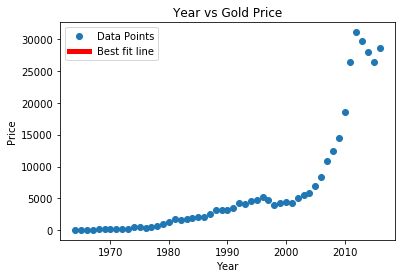

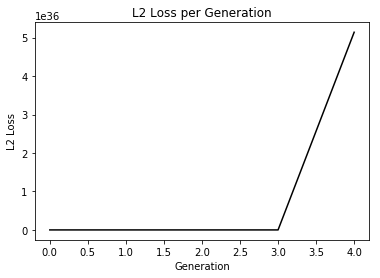

In [50]:
# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=5)
plt.legend(loc='upper left')
plt.title('Year vs Gold Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()